In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor

from sklearn.preprocessing import StandardScaler,MinMaxScaler

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import shap
import xgboost

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [5]:
df = pd.read_csv('body_data2.csv', encoding='utf-8-sig')
# 성별 One-Hot encoding우리가 사용하는 성별은 범주의 차이가 없으므로 dummies로 진행
mod_df = pd.get_dummies(df,columns=['성별'])
mod_df

,측정월,측정일,모델번호,키,목뒤높이,엉덩이높이,겨드랑높이,허리높이,샅높이,무릎높이,...,손안쪽가쪽직선길이,몸무게,체지방율,나이,신발굽높이,나이대,BMI,체중분류,성별_F,성별_M
0,8,10,F001,161.4,136.1,80.1,119.8,94.2,73.2,41.6,...,7.8,62.9,32.8,37,7.8,30,24.145910,비만,1,0
1,8,10,F002,168.1,140.4,84.7,123.3,107.0,77.3,45.2,...,7.0,56.1,31.5,26,2.7,20,19.853059,비만,1,0
2,8,10,F003,163.4,138.2,81.9,120.6,97.1,74.8,42.3,...,7.6,53.2,25.2,39,8.0,30,19.925422,정상체중,1,0
3,8,23,F004,164.1,137.8,83.2,123.3,100.1,75.4,42.4,...,7.6,49.4,21.8,30,2.5,30,18.344665,정상체중,1,0
4,8,23,F005,152.9,127.7,71.1,111.3,93.8,63.3,37.0,...,7.9,51.9,24.2,44,1.5,40,22.199970,정상체중,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,11,30,M498,167.3,141.2,81.4,123.8,98.5,72.4,42.4,...,7.9,68.0,15.6,58,4.3,50,24.295007,정상체중,0,1
996,11,30,M499,169.9,143.2,81.3,127.9,97.6,69.1,42.4,...,8.2,65.2,17.8,53,4.5,50,22.587119,정상체중,0,1
997,11,29,M500,173.7,145.3,84.6,128.0,101.5,74.8,44.4,...,8.0,67.2,20.3,30,2.9,30,22.272534,정상체중,0,1
998,9,28,F339,153.4,127.4,78.6,111.5,92.1,68.0,37.4,...,7.2,52.1,35.6,61,6.7,60,22.140479,비만,1,0


# 특성 추출

In [6]:
feature_low = ['키', '목둘레', '배꼽수준허리둘레', '엉덩이둘레','편위팔둘레', '넙다리둘레','어깨사이너비', '나이', '몸무게', '체지방율', '성별_M', '성별_F']
feature_mid = ['키', '목둘레', '젖가슴둘레', '허리둘레', '배꼽수준허리둘레', '엉덩이둘레', '넙다리둘레', '무릎둘레', '장딴지둘레', '종아리최소둘레','체지방율', '발목둘레', '편위팔둘레', '편팔꿈치둘레', '손목둘레', '어깨사이너비', '몸무게', '나이', 'BMI', '성별_M', '성별_F'] 
feature_high = ['키', '목뒤높이', '엉덩이높이', '겨드랑높이', '허리높이', '샅높이',
       '무릎높이', '머리둘레', '목둘레', '젖가슴둘레', '허리둘레', '배꼽수준허리둘레', '엉덩이둘레', '넙다리둘레',
       '무릎둘레', '장딴지둘레', '종아리최소둘레', '발목둘레', '편위팔둘레', '편팔꿈치둘레', '손목둘레', '위팔길이',
       '팔길이', '어깨사이너비', '머리수직길이', '얼굴수직길이', '발크기', '발너비', '얼굴너비', '손직선길이',
       '손바닥직선길이', '손안쪽가쪽직선길이', '몸무게', '체지방율', '나이','신발굽높이','나이대','BMI', '성별_M', '성별_F']

df_low = mod_df[feature_low]
df_mid = mod_df[feature_mid]
df_high = mod_df[feature_high]


In [7]:
def LR(X_train, X_test, y_train, y_test):
    # 선형 회귀 모델 생성 및 학습
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    # 테스트 세트에 대한 예측
    y_pred = model.predict(X_test)

    # 평균 제곱 오차 (Mean Squared Error, MSE)
    mse = mean_squared_error(y_test, y_pred)
    print("LR - Mean Squared Error:", mse)
    # 평균 절대 오차 (Mean Absolute Error, MAE)
    mae = mean_absolute_error(y_test, y_pred)
    print("LR - Mean Absolute Error:", mae)
    # 결정 계수 (Coefficient of Determination, R^2)
    r2 = r2_score(y_test, y_pred)
    print("LR - R^2 Score:", r2)
    # 평균 제곱근 오차 (Root Mean Squared Error, RMSE)
    rmse = np.sqrt(mse)
    print("LR - Root Mean Squared Error:", rmse)

    return y_pred,[mae,mse,rmse,r2]

def plot_pred_real(y_pred,y_test,text):
    # RMSE 계산 k-feature
    real = y_test.to_list()
    rmse = np.sqrt(((y_pred - real) ** 2).mean())
    # 산점도 그래프
    plt.figure(figsize=(8, 6))
    plt.scatter(real, y_pred, c=np.abs(y_pred - real), cmap='viridis', s=50)
    plt.plot(real, real, c='r', linestyle='-',label = 'x=y')
    plt.title(fr'{text} Prediction vs. Actual (RMSE = {rmse:.4f})')
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.colorbar(label='Absolute Residuals')
    plt.grid(True)
    plt.legend()
    plt.savefig(fr'./plot_v5/{text}_scatter_v5.png')
    plt.show()
    return np.abs(y_pred - real)

low feature
LR - Mean Squared Error: 12.513719891290648
LR - Mean Absolute Error: 2.727922928140897
LR - R^2 Score: 0.7208446035952458
LR - Root Mean Squared Error: 3.5374736594483145


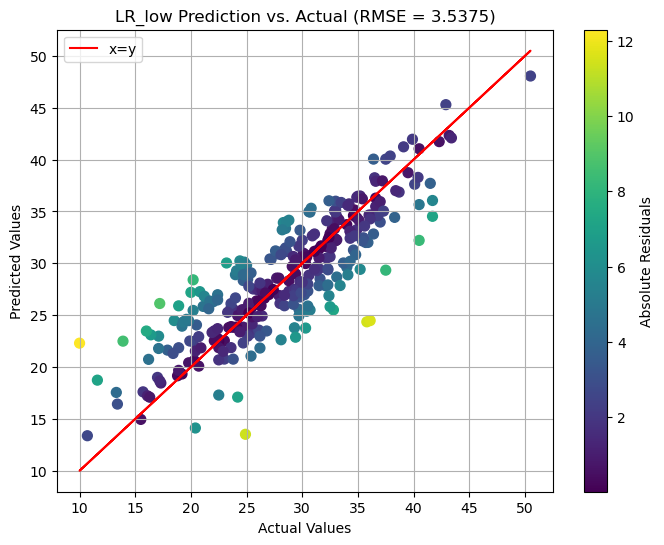

0.0071075044443453805 12.301122344573365

mid feature
LR - Mean Squared Error: 11.311311880634058
LR - Mean Absolute Error: 2.597437113719856
LR - R^2 Score: 0.7476678574135374
LR - Root Mean Squared Error: 3.3632293826966455


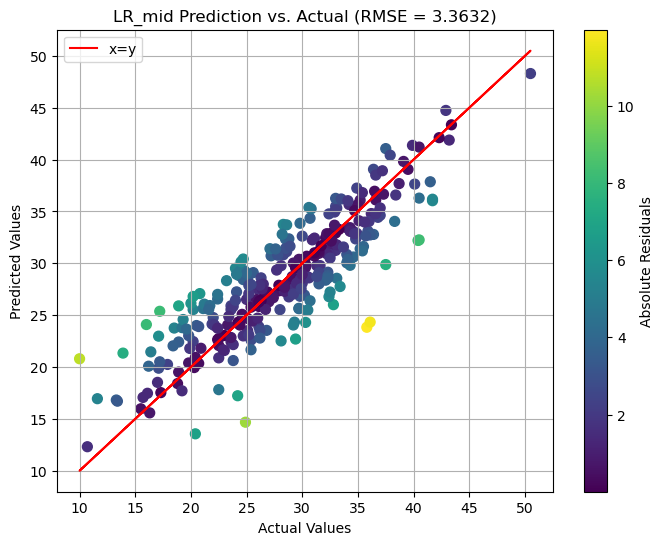

0.0032039604712998937 11.965365199620571

high feature
LR - Mean Squared Error: 11.786101959165805
LR - Mean Absolute Error: 2.619281306686938
LR - R^2 Score: 0.737076265646023
LR - Root Mean Squared Error: 3.4330892734046117


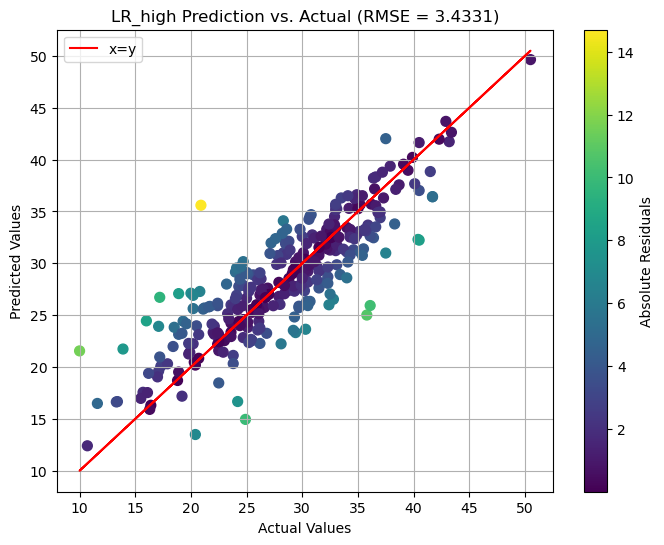

0.001367956548001814 14.699661239605213


In [8]:
print("low feature")
# 특성과 타겟 분리
X_low = df_low.drop(columns=['체지방율'])
y_low = df_low['체지방율'] 
X_train, X_test, y_train, y_test = train_test_split(X_low, y_low, test_size=0.3, random_state=777)
y_pred,linear_low = LR(X_train, X_test, y_train, y_test)
residuals = plot_pred_real(y_pred,y_test,'LR_low')
print(min(residuals),max(residuals))

plt.show()
print("\nmid feature")
X_mid = df_mid.drop(columns=['체지방율'])
y_mid = df_mid['체지방율'] 
X_train, X_test, y_train, y_test = train_test_split(X_mid, y_mid, test_size=0.3, random_state=777)
y_pred,linear_mid = LR(X_train, X_test, y_train, y_test)
residuals = plot_pred_real(y_pred,y_test,'LR_mid')
print(min(residuals),max(residuals))

print("\nhigh feature")
X_high = df_high.drop(columns=['체지방율'])
y_high = df_high['체지방율'] 
X_train, X_test, y_train, y_test = train_test_split(X_high, y_high, test_size=0.3, random_state=777)
y_pred,linear_high = LR(X_train, X_test, y_train, y_test)
residuals = plot_pred_real(y_pred,y_test,'LR_high')
print(min(residuals),max(residuals))

# 표준화 및 정규화 스케일링

In [9]:
def z_score(train,test, target_column):
    scaler = StandardScaler()
    
    train_copy = train.copy()
    test_copy = test.copy()
    
    train_gender = train_copy[['성별_M', '성별_F']]
    train_data = train_copy.drop(columns=['성별_M', '성별_F'])
    
    test_gender = test_copy[['성별_M', '성별_F']]
    test_data = test_copy.drop(columns=['성별_M', '성별_F'])
    
    # 데이터 표준화
    train_data[train_data.columns] = scaler.fit_transform(train_data[train_data.columns])
    test_data[test_data.columns] = scaler.transform(test_data[test_data.columns])
    # 표준화된 데이터와 성별 변수 결합
    train_scaled = pd.concat([train_data, train_gender], axis=1)
    test_scaled = pd.concat([test_data, test_gender], axis=1)
    return train_scaled,test_scaled

def minmax(train,test, target_column):
    scaler = MinMaxScaler()
    
    train_copy = train.copy()
    test_copy = test.copy()
    
    train_gender = train_copy[['성별_M', '성별_F']]
    train_data = train_copy.drop(columns=['성별_M', '성별_F'])
    
    test_gender = test_copy[['성별_M', '성별_F']]
    test_data = test_copy.drop(columns=['성별_M', '성별_F'])
    
    # 데이터 표준화
    train_data[train_data.columns] = scaler.fit_transform(train_data[train_data.columns])
    test_data[test_data.columns] = scaler.transform(test_data[test_data.columns])
    # 표준화된 데이터와 성별 변수 결합
    train_scaled = pd.concat([train_data, train_gender], axis=1)
    test_scaled = pd.concat([test_data, test_gender], axis=1)

In [10]:
# low 
X_train, X_test, y_train, y_test = train_test_split(X_low, y_low, test_size=0.3, random_state=777)

print("low feature z-score")
z_score(X_train,X_test, '체지방율')
LR(X_train, X_test, y_train, y_test)
print('\n')

print("low feature min-max")
minmax(X_train,X_test, '체지방율')
LR(X_train, X_test, y_train, y_test)
print('\n')

# mid
X_train, X_test, y_train, y_test = train_test_split(X_mid, y_mid, test_size=0.3, random_state=777)

print("mid feature z-score")
z_score(X_train,X_test, '체지방율')
LR(X_train, X_test, y_train, y_test)
print('\n')

print("mid feature min-max")
minmax(X_train,X_test, '체지방율')
LR(X_train, X_test, y_train, y_test)
print('\n')

# high
X_train, X_test, y_train, y_test = train_test_split(X_high, y_high, test_size=0.3, random_state=777)

print("high feature z-score")
z_score(X_train,X_test, '체지방율')
LR(X_train, X_test, y_train, y_test)
print('\n')

print("high feature min-max")
minmax(X_train,X_test, '체지방율')
LR(X_train, X_test, y_train, y_test)


low feature z-score
LR - Mean Squared Error: 12.513719891290648
LR - Mean Absolute Error: 2.727922928140897
LR - R^2 Score: 0.7208446035952458
LR - Root Mean Squared Error: 3.5374736594483145


low feature min-max
LR - Mean Squared Error: 12.513719891290648
LR - Mean Absolute Error: 2.727922928140897
LR - R^2 Score: 0.7208446035952458
LR - Root Mean Squared Error: 3.5374736594483145


mid feature z-score
LR - Mean Squared Error: 11.311311880634058
LR - Mean Absolute Error: 2.597437113719856
LR - R^2 Score: 0.7476678574135374
LR - Root Mean Squared Error: 3.3632293826966455


mid feature min-max
LR - Mean Squared Error: 11.311311880634058
LR - Mean Absolute Error: 2.597437113719856
LR - R^2 Score: 0.7476678574135374
LR - Root Mean Squared Error: 3.3632293826966455


high feature z-score
LR - Mean Squared Error: 11.786101959165805
LR - Mean Absolute Error: 2.619281306686938
LR - R^2 Score: 0.737076265646023
LR - Root Mean Squared Error: 3.4330892734046117


high feature min-max
LR - Mean

(array([22.54540235, 36.41512603, 18.46309224, 35.70780479, 22.66279787,
        31.00256365, 32.4644568 , 35.65314874, 22.24408439, 27.84003046,
        26.64346572, 29.85850813, 31.22507835, 25.63212565, 27.3886827 ,
        27.43320029, 28.88760207, 28.4087598 , 27.60695336, 28.53915356,
        32.17048456, 25.99368922, 25.74329448, 23.34495426, 38.84964632,
        27.47048967, 25.86088116, 30.86395253, 31.63890001, 31.29930501,
        38.9732723 , 27.11907486, 23.11589685, 22.19644927, 20.07993704,
        23.81520654, 25.52935501, 21.73510793, 35.55375301, 26.80415149,
        28.50262352, 27.28401879, 31.9613773 , 13.49147555, 29.25796357,
        29.1909776 , 34.54868094, 25.58371651, 24.82578961, 26.0360046 ,
        23.15163844, 34.39424376, 32.74142061, 18.70179304, 31.09925067,
        28.91495039, 24.40520858, 31.01517855, 32.58509703, 24.23450366,
        27.06162639, 25.54666463, 22.54612646, 37.0207871 , 32.85578756,
        22.56744162, 31.27786222, 33.68342538, 25.9

# Ridge & Lasso Model

In [11]:
def Ridge_Reg(alpha,X_train, X_test, y_train, y_test):
    # 선형 회귀 모델 생성 및 학습
    model = Ridge(alpha=alpha)
    model.fit(X_train, y_train)
    
    # 테스트 세트에 대한 예측
    y_pred = model.predict(X_test)

    # 평균 제곱 오차 (Mean Squared Error, MSE)
    mse = mean_squared_error(y_test, y_pred)
    print("LR - Mean Squared Error:", mse)
    # 평균 절대 오차 (Mean Absolute Error, MAE)
    mae = mean_absolute_error(y_test, y_pred)
    print("LR - Mean Absolute Error:", mae)
    # 결정 계수 (Coefficient of Determination, R^2)
    r2 = r2_score(y_test, y_pred)
    print("LR - R^2 Score:", r2)
    # 평균 제곱근 오차 (Root Mean Squared Error, RMSE)
    rmse = np.sqrt(mse)
    print("LR - Root Mean Squared Error:", rmse)

    
    # 독립 변수의 Ridge학습시 계수
    coefficients = model.coef_
    feature_names = X_train.columns  # 독립 변수 이름
    
    print("독립 변수의 계수:")
    for feature_name, coef in zip(feature_names, coefficients):
        print(f"{feature_name}: {coef}")
    
    return y_pred,[mae,mse,rmse,r2]

def Lasso_Reg(alpha,X_train, X_test, y_train, y_test):
    # 선형 회귀 모델 생성 및 학습
    model = Lasso(alpha=alpha)
    model.fit(X_train, y_train)
    
    # 테스트 세트에 대한 예측
    y_pred = model.predict(X_test)

    # 평균 제곱 오차 (Mean Squared Error, MSE)
    mse = mean_squared_error(y_test, y_pred)
    print("LR - Mean Squared Error:", mse)
    # 평균 절대 오차 (Mean Absolute Error, MAE)
    mae = mean_absolute_error(y_test, y_pred)
    print("LR - Mean Absolute Error:", mae)
    # 결정 계수 (Coefficient of Determination, R^2)
    r2 = r2_score(y_test, y_pred)
    print("LR - R^2 Score:", r2)
    # 평균 제곱근 오차 (Root Mean Squared Error, RMSE)
    rmse = np.sqrt(mse)
    print("LR - Root Mean Squared Error:", rmse)

    
    # 독립 변수의 Ridge학습시 계수
    coefficients = model.coef_
    feature_names = X_train.columns  # 독립 변수 이름
    
    print("독립 변수의 계수:")
    for feature_name, coef in zip(feature_names, coefficients):
        print(f"{feature_name}: {coef}")
        #print(f"{feature_name}, ",end='')
    return y_pred,[mae,mse,rmse,r2]

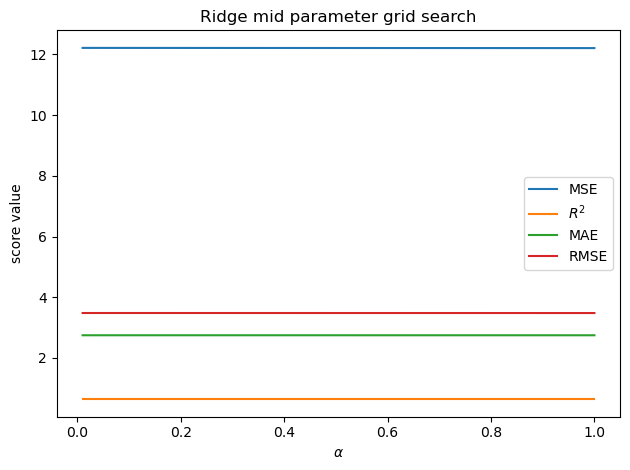

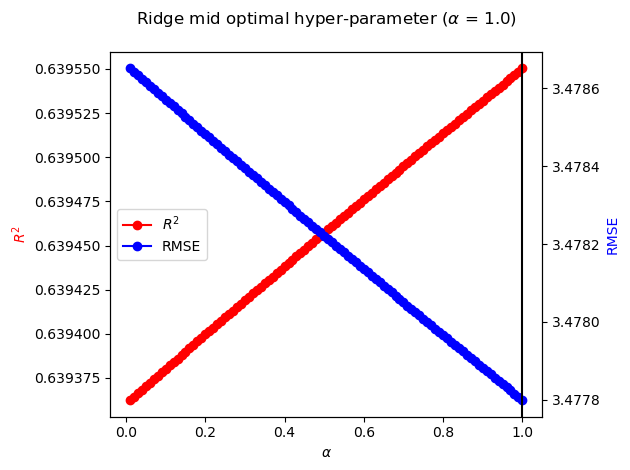

In [12]:
# GridSearchCV를 사용하여 그리드 탐색 수행
alphas = np.linspace(0.01,1, 100)
param_grid = {'alpha': alphas}
scoring = {'neg_mean_squared_error': 'neg_mean_squared_error',
           'r2': 'r2',
           'neg_mean_absolute_error': 'neg_mean_absolute_error',
           'neg_root_mean_squared_error': 'neg_root_mean_squared_error'}

grid_search = GridSearchCV(estimator=Ridge(), param_grid=param_grid, cv=20, scoring=scoring, refit=False)
#grid_search.fit(X_low, y_low)
grid_search.fit(X_mid, y_mid)
#grid_search.fit(X_high, y_high)
text = 'mid'

plt.plot(alphas,-grid_search.cv_results_['mean_test_neg_mean_squared_error'],label='MSE')
plt.plot(alphas,grid_search.cv_results_['mean_test_r2'],label=r'$R^2$')
plt.plot(alphas,-grid_search.cv_results_['mean_test_neg_mean_absolute_error'],label='MAE')
plt.plot(alphas,-grid_search.cv_results_['mean_test_neg_root_mean_squared_error'],label='RMSE')
plt.xlabel(r"$\alpha$")
plt.ylabel('score value')
plt.title(f'Ridge {text} parameter grid search')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig(f'./plot_v5/ridge_{text}_alpha_v5.png')
plt.show()

r2_scores = grid_search.cv_results_['mean_test_r2']
rmse_scores = -grid_search.cv_results_['mean_test_neg_root_mean_squared_error']

fig, ax1 = plt.subplots()
r2_line,=ax1.plot(alphas, r2_scores, label=r'$R^2$', marker='o', color='r')
ax1.set_xlabel(r"$\alpha$")
ax1.set_ylabel(r'$R^2$', color='r')

ax2 = ax1.twinx()
rmse_line,=ax2.plot(alphas, rmse_scores, label='RMSE', marker='o', color='b')
ax2.set_xlabel(r"$\alpha$")
ax2.set_ylabel('RMSE', color='b')

plt.title(rf"Ridge {text} optimal hyper-parameter ($\alpha$ = {alphas[np.argmax(r2_scores)]})",pad=20)
plt.axvline(alphas[np.argmax(r2_scores)],color='k')
plt.legend([r2_line, rmse_line], [r'$R^2$', 'RMSE'], loc='center left')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.savefig(f'./plot_v5/ridge_{text}_optimal.png')
plt.show()

특성의 수와 무관하며 alpha값이 1일때 가장 성능이 좋다.

low feature
LR - Mean Squared Error: 12.523150473131176
LR - Mean Absolute Error: 2.728264836583007
LR - R^2 Score: 0.7206342266781588
LR - Root Mean Squared Error: 3.5388063627628985
독립 변수의 계수:
키: -0.3878928834106569
목둘레: -0.19055424235729418
배꼽수준허리둘레: 0.4180926329385402
엉덩이둘레: 0.39157856585770073
편위팔둘레: 0.12081708133683794
넙다리둘레: -0.043860135422216895
어깨사이너비: -0.18265823362020228
나이: -0.0078542946128219
몸무게: -0.025185827531343786
성별_M: -1.4394757395238356
성별_F: 1.439475739523949


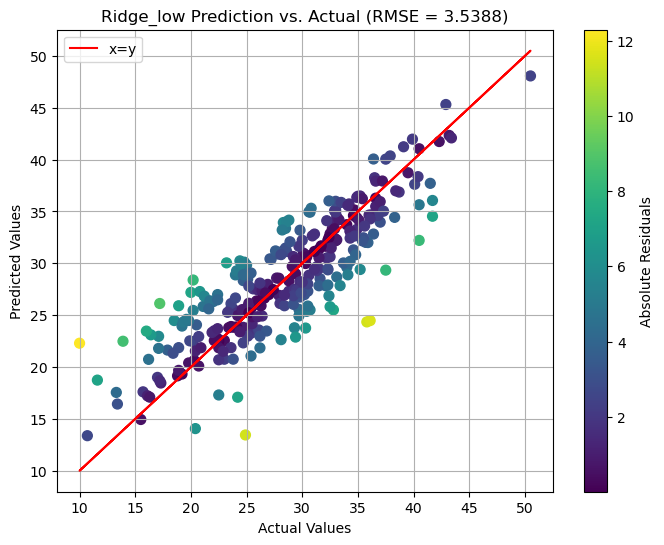

0.003999143108135428 12.29617596885064


mid feature
LR - Mean Squared Error: 11.315503571602251
LR - Mean Absolute Error: 2.597855229357223
LR - R^2 Score: 0.7475743493948188
LR - Root Mean Squared Error: 3.363852489572373
독립 변수의 계수:
키: -0.22677813965231075
목둘레: -0.14948479724609104
젖가슴둘레: -0.03311433890229721
허리둘레: 0.1318512235979474
배꼽수준허리둘레: 0.3016635018493187
엉덩이둘레: 0.3842655915376675
넙다리둘레: -0.05067626614568384
무릎둘레: 0.26225226328527695
장딴지둘레: -0.05932675109811623
종아리최소둘레: -0.05367990732183066
발목둘레: -0.2582312052359479
편위팔둘레: 0.2604154612527803
편팔꿈치둘레: -0.6113895808218642
손목둘레: -0.14333472404644393
어깨사이너비: -0.15801217279811164
몸무게: -0.15315289207081206
나이: 0.00045069161031001354
BMI: 0.5181784701486422
성별_M: -1.6833324728653052
성별_F: 1.6833324728656258


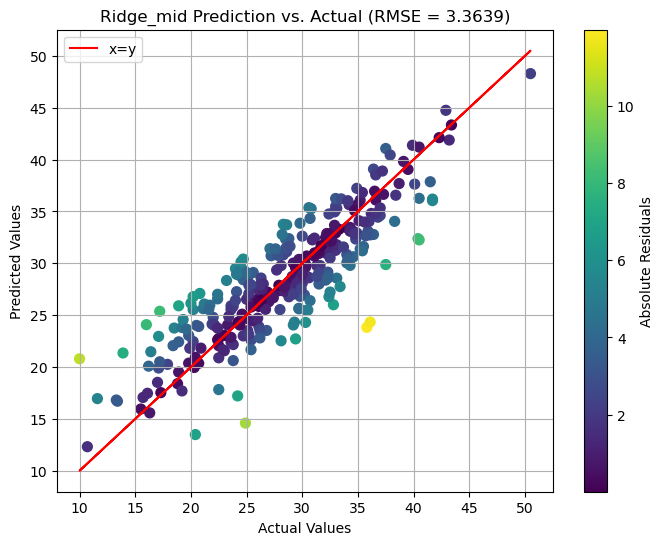

0.00021937822906537008 11.974128301975298


high feature
LR - Mean Squared Error: 11.793092993395424
LR - Mean Absolute Error: 2.6203812278639043
LR - R^2 Score: 0.7369203100270222
LR - Root Mean Squared Error: 3.434107306622119
독립 변수의 계수:
키: -0.2207916317161432
목뒤높이: 0.052436934237978274
엉덩이높이: -0.015028311155574143
겨드랑높이: 0.029979192338876914
허리높이: 0.0013446274048331875
샅높이: -0.0630386562188478
무릎높이: -0.0006550221322919192
머리둘레: 0.029357513830608313
목둘레: -0.16319380498011116
젖가슴둘레: -0.03664893696098635
허리둘레: 0.13507359460813115
배꼽수준허리둘레: 0.27629929916033474
엉덩이둘레: 0.376592385252588
넙다리둘레: -0.04693938043058
무릎둘레: 0.27462820458462067
장딴지둘레: -0.07451659990934185
종아리최소둘레: -0.04418462904974884
발목둘레: -0.12836423212872453
편위팔둘레: 0.2577942998238353
편팔꿈치둘레: -0.5822059980536664
손목둘레: -0.11072648295608788
위팔길이: -0.07971223282370771
팔길이: 0.07995155555970587
어깨사이너비: -0.1623424780882702
머리수직길이: 0.054373664097731526
얼굴수직길이: 0.07074112470197592
발크기: -0.16525632003630975
발너비: -0.5083943877677911
얼굴너비

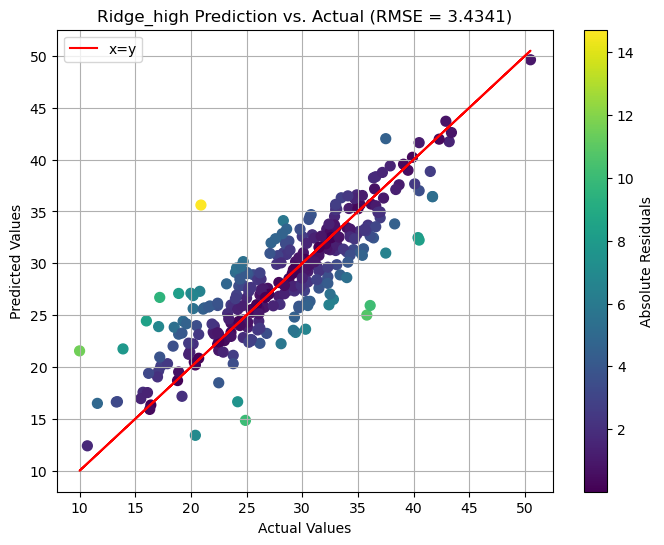

0.007118097341965779 14.71888668676339




In [13]:
# low 
X_train, X_test, y_train, y_test = train_test_split(X_low, y_low, test_size=0.3, random_state=777)

print("low feature")
y_pred,ridge_low = Ridge_Reg(1.0,X_train, X_test, y_train, y_test)
residuals=plot_pred_real(y_pred,y_test,'Ridge_low')
print(min(residuals),max(residuals))
print('\n')

# mid
X_train, X_test, y_train, y_test = train_test_split(X_mid, y_mid, test_size=0.3, random_state=777)

print("mid feature")
y_pred,ridge_mid = Ridge_Reg(1.0,X_train, X_test, y_train, y_test)
residuals=plot_pred_real(y_pred,y_test,'Ridge_mid')
print(min(residuals),max(residuals))
print('\n')

# high
X_train, X_test, y_train, y_test = train_test_split(X_high, y_high, test_size=0.3, random_state=777)

print("high feature")
y_pred,ridge_high = Ridge_Reg(1.0,X_train, X_test, y_train, y_test)
residuals=plot_pred_real(y_pred,y_test,'Ridge_high')
print(min(residuals),max(residuals))
print('\n')


In [14]:
# low 
X_train, X_test, y_train, y_test = train_test_split(X_low, y_low, test_size=0.3, random_state=777)

print("low feature z-score")
z_score(X_train,X_test, '체지방율')
Ridge_Reg(1.0,X_train, X_test, y_train, y_test)
print('\n')

print("low feature min-max")
minmax(X_train,X_test, '체지방율')
Ridge_Reg(1.0,X_train, X_test, y_train, y_test)
print('\n')

# mid
X_train, X_test, y_train, y_test = train_test_split(X_mid, y_mid, test_size=0.3, random_state=777)

print("mid feature z-score")
z_score(X_train,X_test, '체지방율')
Ridge_Reg(1.0,X_train, X_test, y_train, y_test)
print('\n')

print("mid feature min-max")
minmax(X_train,X_test, '체지방율')
Ridge_Reg(1.0,X_train, X_test, y_train, y_test)
print('\n')

# high
X_train, X_test, y_train, y_test = train_test_split(X_high, y_high, test_size=0.3, random_state=777)

print("high feature z-score")
z_score(X_train,X_test, '체지방율')
Ridge_Reg(1.0,X_train, X_test, y_train, y_test)
print('\n')

print("high feature min-max")
minmax(X_train,X_test, '체지방율')
Ridge_Reg(1.0,X_train, X_test, y_train, y_test)


low feature z-score
LR - Mean Squared Error: 12.523150473131176
LR - Mean Absolute Error: 2.728264836583007
LR - R^2 Score: 0.7206342266781588
LR - Root Mean Squared Error: 3.5388063627628985
독립 변수의 계수:
키: -0.3878928834106569
목둘레: -0.19055424235729418
배꼽수준허리둘레: 0.4180926329385402
엉덩이둘레: 0.39157856585770073
편위팔둘레: 0.12081708133683794
넙다리둘레: -0.043860135422216895
어깨사이너비: -0.18265823362020228
나이: -0.0078542946128219
몸무게: -0.025185827531343786
성별_M: -1.4394757395238356
성별_F: 1.439475739523949


low feature min-max
LR - Mean Squared Error: 12.523150473131176
LR - Mean Absolute Error: 2.728264836583007
LR - R^2 Score: 0.7206342266781588
LR - Root Mean Squared Error: 3.5388063627628985
독립 변수의 계수:
키: -0.3878928834106569
목둘레: -0.19055424235729418
배꼽수준허리둘레: 0.4180926329385402
엉덩이둘레: 0.39157856585770073
편위팔둘레: 0.12081708133683794
넙다리둘레: -0.043860135422216895
어깨사이너비: -0.18265823362020228
나이: -0.0078542946128219
몸무게: -0.025185827531343786
성별_M: -1.4394757395238356
성별_F: 1.439475739523949


mid feat

(array([22.56215963, 36.42368393, 18.47872602, 35.70817127, 22.64881987,
        30.99591812, 32.45144552, 35.65417927, 22.23501764, 27.84110619,
        26.65734702, 29.86491923, 31.23634539, 25.63012951, 27.40079474,
        27.42578494, 28.89905278, 28.40254158, 27.58963468, 28.51792523,
        32.18011694, 25.98187931, 25.75662609, 23.37004658, 38.85954952,
        27.47667208, 25.87032752, 30.85923965, 31.62927237, 31.3155369 ,
        38.97442365, 27.11188659, 23.13243052, 22.18157977, 20.09141287,
        23.82252607, 25.53272598, 21.74725758, 35.55196291, 26.81705203,
        28.47477153, 27.29883171, 31.97103119, 13.41481931, 29.26072596,
        29.17632647, 34.54522846, 25.58193872, 24.81683873, 26.03741724,
        23.16365641, 34.38432838, 32.75107301, 18.69403363, 31.10355836,
        28.88223696, 24.42088842, 31.02190574, 32.58888081, 24.24997228,
        27.06189725, 25.55246837, 22.56893276, 37.00226129, 32.86655008,
        22.54902834, 31.30436633, 33.67806614, 25.9

## Lasso

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.113e+01, tolerance: 4.664e+00
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.011e+00, tolerance: 4.664e+00


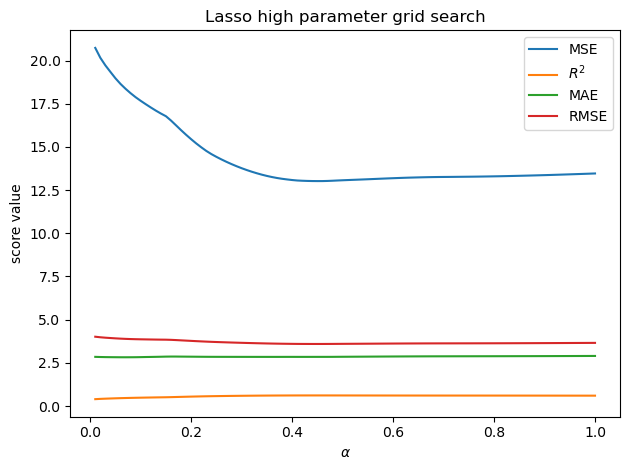

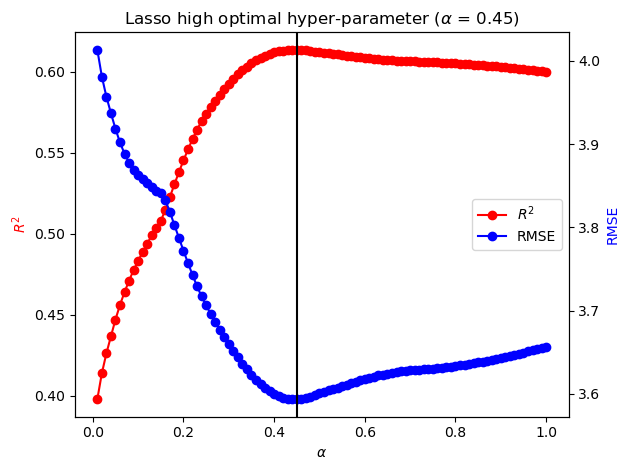

In [15]:
# GridSearchCV를 사용하여 그리드 탐색 수행
param_grid = {'alpha': np.linspace(0.01,1, 100)}
scoring = {'neg_mean_squared_error': 'neg_mean_squared_error',
           'r2': 'r2',
           'neg_mean_absolute_error': 'neg_mean_absolute_error',
           'neg_root_mean_squared_error': 'neg_root_mean_squared_error'}

grid_search = GridSearchCV(estimator=Lasso(), param_grid=param_grid, cv=20, scoring=scoring, refit=False)
#grid_search.fit(X_low, y_low)
#grid_search.fit(X_mid, y_mid)
grid_search.fit(X_high, y_high)
text='high'

plt.plot(alphas,-grid_search.cv_results_['mean_test_neg_mean_squared_error'],label='MSE')
plt.plot(alphas,grid_search.cv_results_['mean_test_r2'],label=r'$R^2$')
plt.plot(alphas,-grid_search.cv_results_['mean_test_neg_mean_absolute_error'],label='MAE')
plt.plot(alphas,-grid_search.cv_results_['mean_test_neg_root_mean_squared_error'],label='RMSE')
plt.xlabel(r"$\alpha$")
plt.ylabel('score value')
plt.title(f'Lasso {text} parameter grid search')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig(f'./plot_v5/lasso_{text}_alpha_v5.png')
plt.show()

r2_scores = grid_search.cv_results_['mean_test_r2']
rmse_scores = -grid_search.cv_results_['mean_test_neg_root_mean_squared_error']

fig, ax1 = plt.subplots()
r2_line,=ax1.plot(alphas, r2_scores, label=r'$R^2$', marker='o', color='r')
ax1.set_xlabel(r"$\alpha$")
ax1.set_ylabel(r'$R^2$', color='r')

ax2 = ax1.twinx()
rmse_line,=ax2.plot(alphas, rmse_scores, label='RMSE', marker='o', color='b')
ax2.set_xlabel(r"$\alpha$")
ax2.set_ylabel('RMSE', color='b')

plt.title(rf"Lasso {text} optimal hyper-parameter ($\alpha$ = {alphas[np.argmax(r2_scores)]})")
plt.axvline(alphas[np.argmax(r2_scores)],color='k')
plt.legend([r2_line, rmse_line], [r'$R^2$', 'RMSE'], loc='center right')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.savefig(f'./plot_v5/lasso_{text}_optimal.png')
plt.show()

low feature
LR - Mean Squared Error: 12.550715647176185
LR - Mean Absolute Error: 2.7296569817440908
LR - R^2 Score: 0.7200193042446739
LR - Root Mean Squared Error: 3.5426989213276627
독립 변수의 계수:
키: -0.3918813120388356
목둘레: -0.19298149885502044
배꼽수준허리둘레: 0.4183513745386391
엉덩이둘레: 0.39765410158866454
편위팔둘레: 0.11223772613482401
넙다리둘레: -0.042947402619132366
어깨사이너비: -0.1851868670516105
나이: -0.008400628648600406
몸무게: -0.026942424236158714
성별_M: -2.732852378972681
성별_F: 0.0


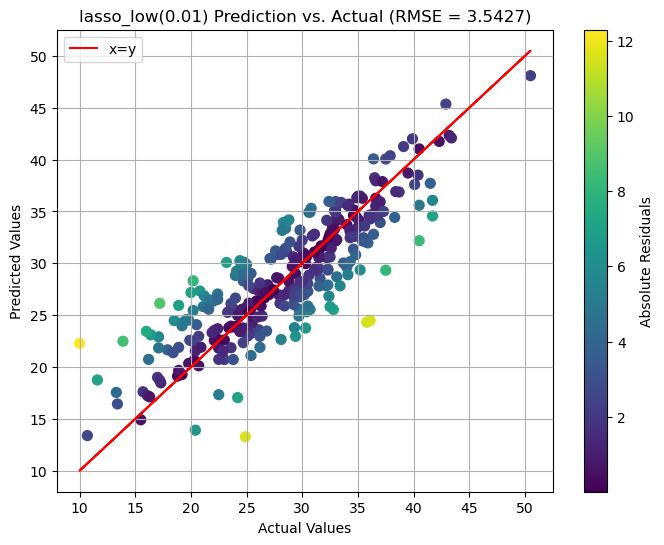

0.007614669306544641 12.286850723717361


mid feature
LR - Mean Squared Error: 11.462352832623496
LR - Mean Absolute Error: 2.61245693639626
LR - R^2 Score: 0.7442984439064226
LR - Root Mean Squared Error: 3.3856096692654183
독립 변수의 계수:
키: -0.3876602217598819
목둘레: -0.15903275229781844
젖가슴둘레: -0.024698911121813803
허리둘레: 0.12551113742092168
배꼽수준허리둘레: 0.3133483497956598
엉덩이둘레: 0.429120816350693
넙다리둘레: -0.046284173120822475
무릎둘레: 0.2383023776818798
장딴지둘레: -0.04299628096667577
종아리최소둘레: -0.05446597789455141
발목둘레: -0.2761986866271443
편위팔둘레: 0.20077400017787586
편팔꿈치둘레: -0.5111339335018176
손목둘레: -0.08244181129523848
어깨사이너비: -0.1759096805805348
몸무게: -0.005272938721396865
나이: -0.00418818444554731
BMI: 0.0
성별_M: -2.4643852612092605
성별_F: 9.948897748510596e-16


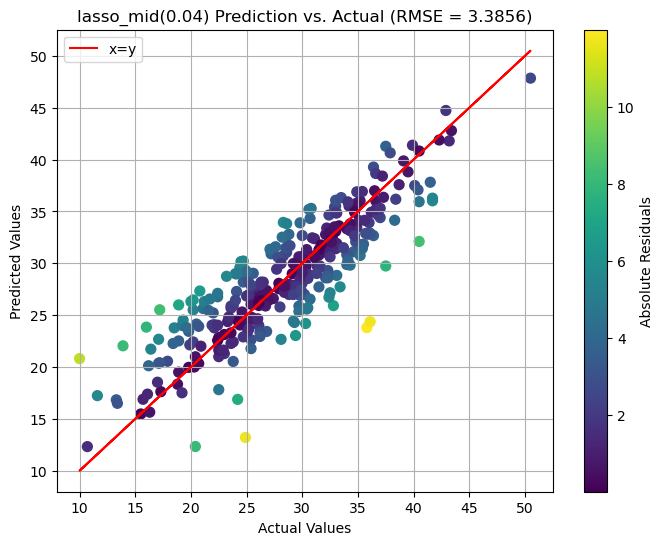

0.0026661782459420635 11.996591154038988
error= 10.811910493936459


high feature
LR - Mean Squared Error: 13.399750762766297
LR - Mean Absolute Error: 2.8217488121962164
LR - R^2 Score: 0.7010790741361934
LR - Root Mean Squared Error: 3.660567000174467
독립 변수의 계수:
키: -0.4783682765959543
목뒤높이: 0.03163192693788302
엉덩이높이: 0.0
겨드랑높이: 0.0
허리높이: 0.001777203890620493
샅높이: -0.02243846575874196
무릎높이: -0.014825862843340396
머리둘레: -0.0
목둘레: -0.20725395511834435
젖가슴둘레: -0.0016356512242834357
허리둘레: 0.018920597432873415
배꼽수준허리둘레: 0.3798588194319331
엉덩이둘레: 0.48789936658390154
넙다리둘레: -0.010469276496699015
무릎둘레: 0.0
장딴지둘레: -0.0
종아리최소둘레: -0.03395544494962968
발목둘레: -0.07696070362060564
편위팔둘레: 0.0
편팔꿈치둘레: -0.0
손목둘레: -0.0
위팔길이: 0.0
팔길이: 0.01509101108279406
어깨사이너비: -0.21200215767244898
머리수직길이: -0.0
얼굴수직길이: -0.0
발크기: -0.0
발너비: -0.09663728174550125
얼굴너비: 0.0
손직선길이: -0.0
손바닥직선길이: -0.0
손안쪽가쪽직선길이: -0.055656734773808385
몸무게: -0.049736575567232745
나이: -0.01288286810463043
신발굽높이: -0.0
나이대: 0.0
BMI: -0.0
성별_M: -0.0
성

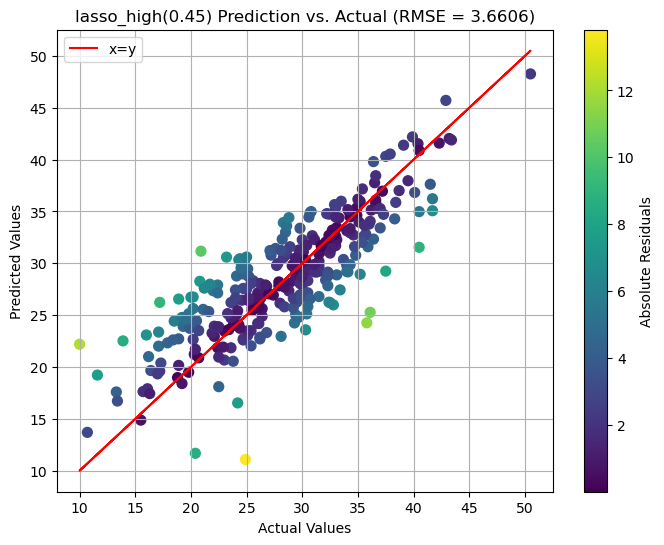

0.0024405373653131335 13.816440792965459




In [16]:
# low 
X_train, X_test, y_train, y_test = train_test_split(X_low, y_low, test_size=0.3, random_state=777)

print("low feature")
y_pred,lasso_low = Lasso_Reg(0.01,X_train, X_test, y_train, y_test)
residuals=plot_pred_real(y_pred,y_test,'lasso_low(0.01)')
print(min(residuals),max(residuals))
print('\n')

# mid
X_train, X_test, y_train, y_test = train_test_split(X_mid, y_mid, test_size=0.3, random_state=777)

print("mid feature")
y_pred,lasso_mid = Lasso_Reg(0.04,X_train, X_test, y_train, y_test)
residuals=plot_pred_real(y_pred,y_test,'lasso_mid(0.04)')
print(min(residuals),max(residuals))
print('error=',max(y_pred-y_test.to_list()))
print('\n')

# high
X_train, X_test, y_train, y_test = train_test_split(X_high, y_high, test_size=0.3, random_state=777)

print("high feature")
y_pred,lasso_high = Lasso_Reg(0.45,X_train, X_test, y_train, y_test)
residuals=plot_pred_real(y_pred,y_test,'lasso_high(0.45)')
print(min(residuals),max(residuals))
print('\n')

In [17]:
# low 
X_train, X_test, y_train, y_test = train_test_split(X_low, y_low, test_size=0.3, random_state=777)

print("low feature z-score")
z_score(X_train,X_test, '체지방율')
Lasso_Reg(0.01,X_train, X_test, y_train, y_test)
print('\n')

print("low feature min-max")
minmax(X_train,X_test, '체지방율')
Lasso_Reg(0.01,X_train, X_test, y_train, y_test)
print('\n')

# mid
X_train, X_test, y_train, y_test = train_test_split(X_mid, y_mid, test_size=0.3, random_state=777)

print("mid feature z-score")
z_score(X_train,X_test, '체지방율')
Lasso_Reg(0.04,X_train, X_test, y_train, y_test)
print('\n')

print("mid feature min-max")
minmax(X_train,X_test, '체지방율')
Lasso_Reg(0.04,X_train, X_test, y_train, y_test)
print('\n')

# high
X_train, X_test, y_train, y_test = train_test_split(X_high, y_high, test_size=0.3, random_state=777)

print("high feature z-score")
z_score(X_train,X_test, '체지방율')
Lasso_Reg(0.45,X_train, X_test, y_train, y_test)
print('\n')

print("high feature min-max")
minmax(X_train,X_test, '체지방율')
Lasso_Reg(0.45,X_train, X_test, y_train, y_test)


low feature z-score
LR - Mean Squared Error: 12.550715647176185
LR - Mean Absolute Error: 2.7296569817440908
LR - R^2 Score: 0.7200193042446739
LR - Root Mean Squared Error: 3.5426989213276627
독립 변수의 계수:
키: -0.3918813120388356
목둘레: -0.19298149885502044
배꼽수준허리둘레: 0.4183513745386391
엉덩이둘레: 0.39765410158866454
편위팔둘레: 0.11223772613482401
넙다리둘레: -0.042947402619132366
어깨사이너비: -0.1851868670516105
나이: -0.008400628648600406
몸무게: -0.026942424236158714
성별_M: -2.732852378972681
성별_F: 0.0


low feature min-max
LR - Mean Squared Error: 12.550715647176185
LR - Mean Absolute Error: 2.7296569817440908
LR - R^2 Score: 0.7200193042446739
LR - Root Mean Squared Error: 3.5426989213276627
독립 변수의 계수:
키: -0.3918813120388356
목둘레: -0.19298149885502044
배꼽수준허리둘레: 0.4183513745386391
엉덩이둘레: 0.39765410158866454
편위팔둘레: 0.11223772613482401
넙다리둘레: -0.042947402619132366
어깨사이너비: -0.1851868670516105
나이: -0.008400628648600406
몸무게: -0.026942424236158714
성별_M: -2.732852378972681
성별_F: 0.0


mid feature z-score
LR - Mean Squa

(array([23.46395653, 35.07077729, 18.10394474, 35.12956814, 23.50642796,
        30.53875989, 32.33570269, 35.98111582, 22.6591442 , 27.88002559,
        27.48987023, 28.88484219, 31.70752571, 25.63488166, 28.04761214,
        24.89967721, 28.31491072, 27.13625892, 27.11265042, 27.33455821,
        33.00724377, 24.86422239, 27.1164463 , 27.35766505, 37.62368777,
        27.77925039, 26.1612929 , 30.84721411, 31.30850212, 32.7315756 ,
        37.96432055, 26.73129498, 23.86826927, 21.86701616, 20.38478699,
        23.05707749, 26.41303127, 22.52210151, 35.78155866, 27.83160873,
        26.70453518, 28.26338581, 30.78583601, 11.68046769, 29.65933075,
        26.26057344, 34.86506242, 25.5558912 , 24.25125231, 26.15406771,
        22.71779285, 33.41128937, 32.65982245, 18.97983138, 29.80164361,
        27.43695883, 24.18746323, 31.1143936 , 32.27136291, 26.21991932,
        25.8058523 , 26.13198998, 25.72376079, 34.98226817, 34.62193834,
        20.67260785, 32.6767352 , 31.59346995, 26.9

# 성능 평가
## 선형 회귀

In [18]:
def autolabel(rects, ax):
    """막대 위에 숫자 값 표시"""
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., height,
                '%.3f' % height,
                ha='center', va='bottom')

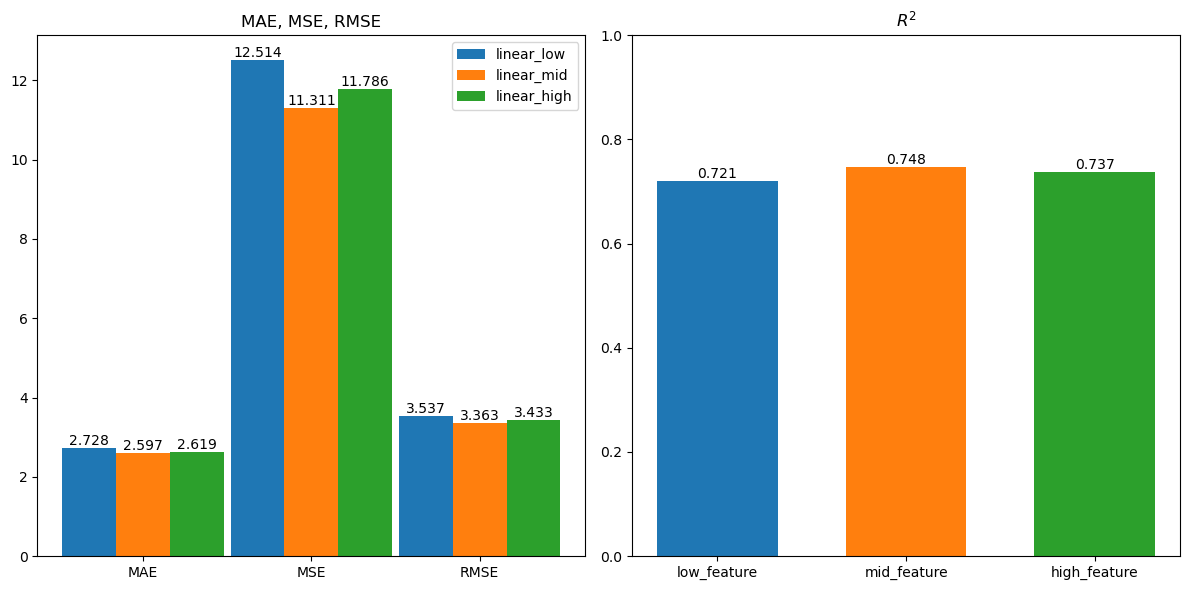

In [19]:
# 데이터 준비
evaluation_metrics = ['MAE', 'MSE', 'RMSE', 'R^2']  # 평가 지표들
low_values = linear_low
mid_values = linear_mid
high_values= linear_high
# 그래프 그리기
plt.figure(figsize=(12, 6))

# 좌측 서브플롯: MAE, MSE, RMSE
plt.subplot(1, 2, 1)
bar_width = 0.32

index = range(len(evaluation_metrics) - 1)  # R^2 제외
bars_low=plt.bar(index, low_values[:-1], width=bar_width, label='linear_low')
bars_mid=plt.bar([i + bar_width for i in index], mid_values[:-1], width=bar_width, label='linear_mid')
bars_high=plt.bar([i + 2 * bar_width for i in index], high_values[:-1], width=bar_width, label='linear_high')
plt.title('MAE, MSE, RMSE')
plt.xticks([i + bar_width for i in index], evaluation_metrics[:-1])
plt.legend()

autolabel(bars_low, plt.subplot(1, 2, 1))
autolabel(bars_mid, plt.subplot(1, 2, 1))
autolabel(bars_high, plt.subplot(1, 2, 1))

# 우측 서브플롯: R^2
plt.subplot(1, 2, 2)
bars_low=plt.bar(0, low_values[-1], width=bar_width*2, label='k')
bars_mid=plt.bar(1, mid_values[-1], width=bar_width*2, label='h')
bars_high=plt.bar(2, high_values[-1], width=bar_width*2, label='total')
plt.title(r'$R^2$')
plt.xticks([0, 1, 2], ['low_feature', 'mid_feature', 'high_feature'])
plt.ylim(0,1.0)

autolabel(bars_low, plt.subplot(1, 2, 2))
autolabel(bars_mid, plt.subplot(1, 2, 2))
autolabel(bars_high, plt.subplot(1, 2, 2))

# 그래프 보이기
plt.tight_layout()
plt.savefig(f'./plot_v5/Linear_score.png')
plt.show()

## 릿지

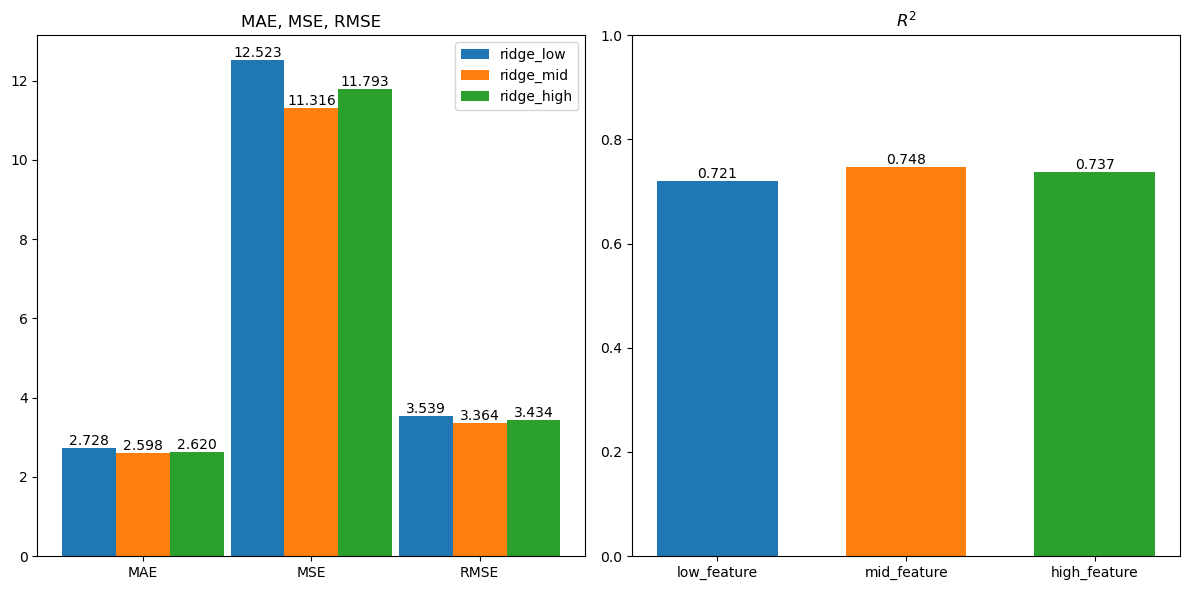

In [20]:
import matplotlib.pyplot as plt

# 데이터 준비
evaluation_metrics = ['MAE', 'MSE', 'RMSE', 'R^2']  # 평가 지표들

low_values = ridge_low
mid_values = ridge_mid
high_values= ridge_high
# 그래프 그리기
plt.figure(figsize=(12, 6))

# 좌측 서브플롯: MAE, MSE, RMSE
plt.subplot(1, 2, 1)
bar_width = 0.32
index = range(len(evaluation_metrics) - 1)  # R^2 제외
bars_low=plt.bar(index, low_values[:-1], width=bar_width, label='ridge_low')
bars_mid=plt.bar([i + bar_width for i in index], mid_values[:-1], width=bar_width, label='ridge_mid')
bars_high=plt.bar([i + 2 * bar_width for i in index], high_values[:-1], width=bar_width, label='ridge_high')
plt.title('MAE, MSE, RMSE')
plt.xticks([i + bar_width for i in index], evaluation_metrics[:-1])
plt.legend()

autolabel(bars_low, plt.subplot(1, 2, 1))
autolabel(bars_mid, plt.subplot(1, 2, 1))
autolabel(bars_high, plt.subplot(1, 2, 1))

# 우측 서브플롯: R^2
plt.subplot(1, 2, 2)
bars_low=plt.bar(0, low_values[-1], width=bar_width*2, label='k')
bars_mid=plt.bar(1, mid_values[-1], width=bar_width*2, label='h')
bars_high=plt.bar(2, high_values[-1], width=bar_width*2, label='total')
plt.title(r'$R^2$')
plt.xticks([0, 1, 2], ['low_feature', 'mid_feature', 'high_feature'])
plt.ylim(0,1.0)

autolabel(bars_low, plt.subplot(1, 2, 2))
autolabel(bars_mid, plt.subplot(1, 2, 2))
autolabel(bars_high, plt.subplot(1, 2, 2))

# 그래프 보이기
plt.tight_layout()
plt.savefig(f'./plot_v5/Ridge_score.png')
plt.show()

## 라쏘

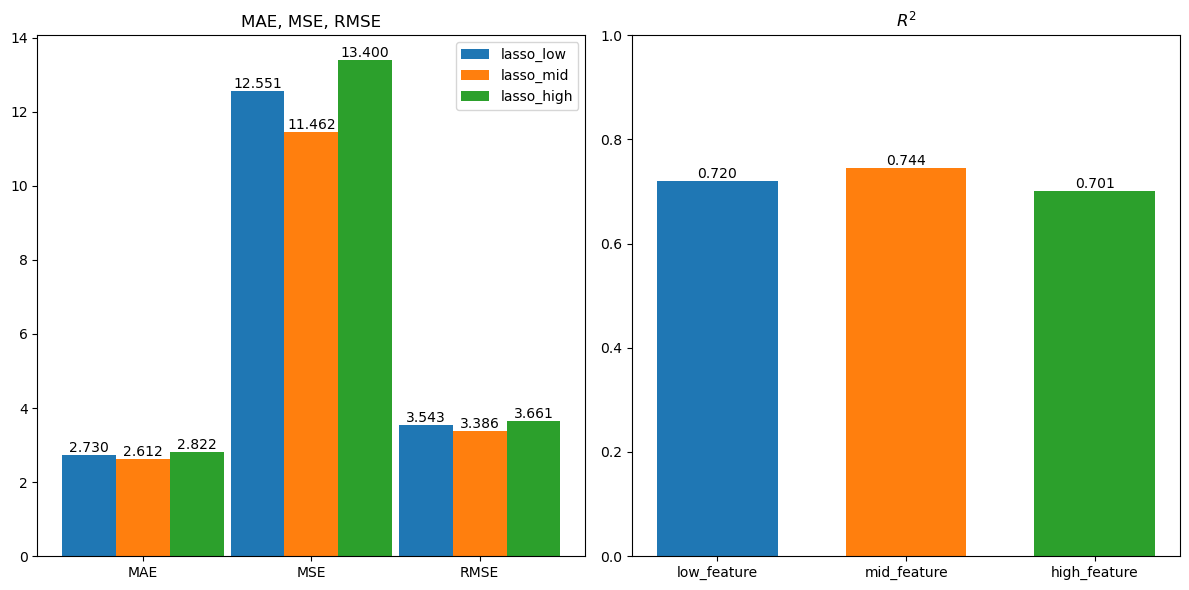

In [21]:
import matplotlib.pyplot as plt

# 데이터 준비
evaluation_metrics = ['MAE', 'MSE', 'RMSE', 'R^2']  # 평가 지표들

low_values = lasso_low
mid_values = lasso_mid
high_values= lasso_high
# 그래프 그리기
plt.figure(figsize=(12, 6))

# 좌측 서브플롯: MAE, MSE, RMSE
plt.subplot(1, 2, 1)
bar_width = 0.32
index = range(len(evaluation_metrics) - 1)  # R^2 제외
bars_low=plt.bar(index, low_values[:-1], width=bar_width, label='lasso_low')
bars_mid=plt.bar([i + bar_width for i in index], mid_values[:-1], width=bar_width, label='lasso_mid')
bars_high=plt.bar([i + 2 * bar_width for i in index], high_values[:-1], width=bar_width, label='lasso_high')
plt.title('MAE, MSE, RMSE')
plt.xticks([i + bar_width for i in index], evaluation_metrics[:-1])
plt.legend()

autolabel(bars_low, plt.subplot(1, 2, 1))
autolabel(bars_mid, plt.subplot(1, 2, 1))
autolabel(bars_high, plt.subplot(1, 2, 1))

# 우측 서브플롯: R^2
plt.subplot(1, 2, 2)
bars_low=plt.bar(0, low_values[-1], width=bar_width*2, label='k')
bars_mid=plt.bar(1, mid_values[-1], width=bar_width*2, label='h')
bars_high=plt.bar(2, high_values[-1], width=bar_width*2, label='total')
plt.title(r'$R^2$')
plt.xticks([0, 1, 2], ['low_feature', 'mid_feature', 'high_feature'])
plt.ylim(0,1.0)

autolabel(bars_low, plt.subplot(1, 2, 2))
autolabel(bars_mid, plt.subplot(1, 2, 2))
autolabel(bars_high, plt.subplot(1, 2, 2))

# 그래프 보이기
plt.tight_layout()
plt.savefig(f'./plot_v5/Lasso_score.png')
plt.show()

## 최종 선택 피쳐

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.347e+01, tolerance: 3.690e+00
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.003e+01, tolerance: 3.690e+00
Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.406e+00, tolerance: 3.690e+00


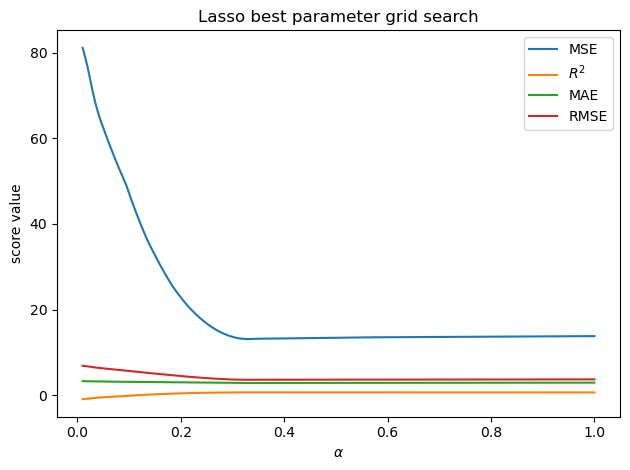

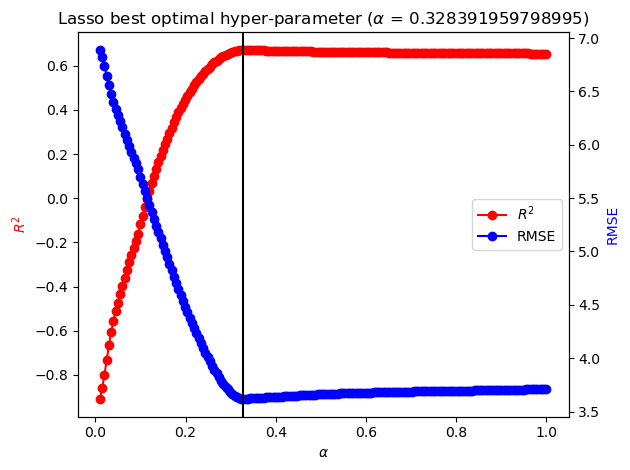

In [24]:
best_feature = ['키', '목둘레', '배꼽수준허리둘레', '엉덩이둘레', '넙다리둘레','종아리최소둘레', '발목둘레', '편팔꿈치둘레',
'어깨사이너비', '몸무게', '체지방율', '나이']

df_best = mod_df[best_feature]

X_best = df_best.drop(columns=['체지방율'])
y_best = df_best['체지방율'] 
X_train, X_test, y_train, y_test = train_test_split(X_best, y_best, test_size=0.3, random_state=777)

# GridSearchCV를 사용하여 그리드 탐색 수행
alphas = np.linspace(0.01,1, 200)
param_grid = {'alpha': alphas}
scoring = {'neg_mean_squared_error': 'neg_mean_squared_error',
           'r2': 'r2',
           'neg_mean_absolute_error': 'neg_mean_absolute_error',
           'neg_root_mean_squared_error': 'neg_root_mean_squared_error'}

grid_search = GridSearchCV(estimator=Lasso(), param_grid=param_grid, cv=5, scoring=scoring, refit=False)
grid_search.fit(X_high, y_high)
text='best'

plt.plot(alphas,-grid_search.cv_results_['mean_test_neg_mean_squared_error'],label='MSE')
plt.plot(alphas,grid_search.cv_results_['mean_test_r2'],label=r'$R^2$')
plt.plot(alphas,-grid_search.cv_results_['mean_test_neg_mean_absolute_error'],label='MAE')
plt.plot(alphas,-grid_search.cv_results_['mean_test_neg_root_mean_squared_error'],label='RMSE')
plt.xlabel(r"$\alpha$")
plt.ylabel('score value')
plt.title(f'Lasso {text} parameter grid search')
plt.legend(loc='best')
plt.tight_layout()
plt.savefig(f'./plot_v5/lasso_{text}_alpha_v5.png')
plt.show()

r2_scores = grid_search.cv_results_['mean_test_r2']
rmse_scores = -grid_search.cv_results_['mean_test_neg_root_mean_squared_error']

fig, ax1 = plt.subplots()
r2_line,=ax1.plot(alphas, r2_scores, label=r'$R^2$', marker='o', color='r')
ax1.set_xlabel(r"$\alpha$")
ax1.set_ylabel(r'$R^2$', color='r')

ax2 = ax1.twinx()
rmse_line,=ax2.plot(alphas, rmse_scores, label='RMSE', marker='o', color='b')
ax2.set_xlabel(r"$\alpha$")
ax2.set_ylabel('RMSE', color='b')

plt.title(rf"Lasso {text} optimal hyper-parameter ($\alpha$ = {alphas[np.argmax(r2_scores)]})")
plt.axvline(alphas[np.argmax(r2_scores)],color='k')
plt.legend([r2_line, rmse_line], [r'$R^2$', 'RMSE'], loc='center right')
plt.ticklabel_format(style='plain', axis='y')
plt.tight_layout()
plt.savefig(f'./plot_v5/lasso_{text}_optimal.png')
plt.show()

best feature

LR - Mean Squared Error: 13.185012927169886
LR - Mean Absolute Error: 2.7925478285044907
LR - R^2 Score: 0.7058694343280286
LR - Root Mean Squared Error: 3.631117311127511
독립 변수의 계수:
키: -0.4575070179821819
목둘레: -0.20849874177991318
배꼽수준허리둘레: 0.40245077492814396
엉덩이둘레: 0.5084674732021843
넙다리둘레: -0.02124943072177934
종아리최소둘레: -0.042528547433381365
발목둘레: -0.19124864721693866
편팔꿈치둘레: -0.05178856669825931
어깨사이너비: -0.21841453618266174
몸무게: -0.03919512269050063
나이: -0.01084172483836481


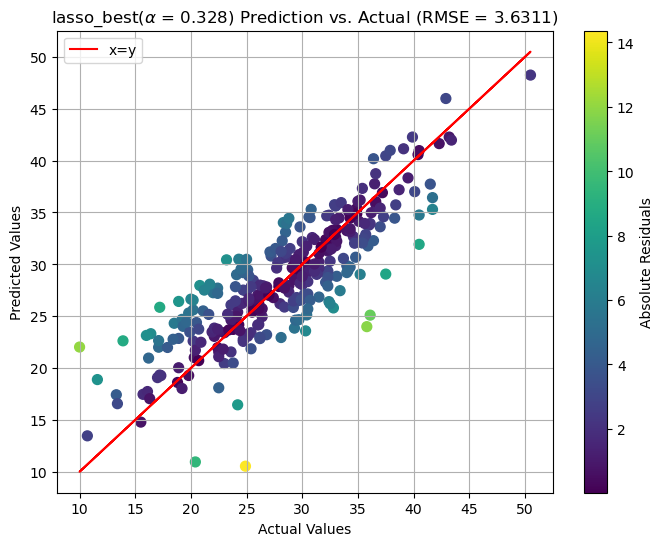

0.010498142127747911 14.365504642882243




In [25]:
print("best feature\n")
y_pred,lasso_mid = Lasso_Reg(alphas[np.argmax(r2_scores)],X_train, X_test, y_train, y_test)
residuals=plot_pred_real(y_pred,y_test,rf'lasso_best($\alpha$ = {alphas[np.argmax(r2_scores)]:.3f})')
print(min(residuals),max(residuals))
print('\n')